##  PRAKTIKUM MANDIRI DI KELAS

1. Import library Decision Tree

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

2. Konek ke gdrive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3. Loading dataset


*  membaca dataset


In [6]:
# Membaca file csv dan menampilkan 5 bari data teratas
df = pd.read_csv('/content/drive/MyDrive/Praktikum_ML/Praktikum07/data/college.csv')
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan


*  menampilkan informasi umum dataset


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


4. data pre-processing


*  cek duplikat pada dataset

In [8]:
# Cek duplikat pada dataset
df.duplicated().sum()

np.int64(0)

*  cek missing value

In [9]:
df.isnull().sum()

,0
StudentID,0
Gender,0
Parent_income,0
IQ,0
Encourage,0
Plan,0


5. data understanding (Exploratory Data Analysis)

*  visualisasi distribusi label target (plan)

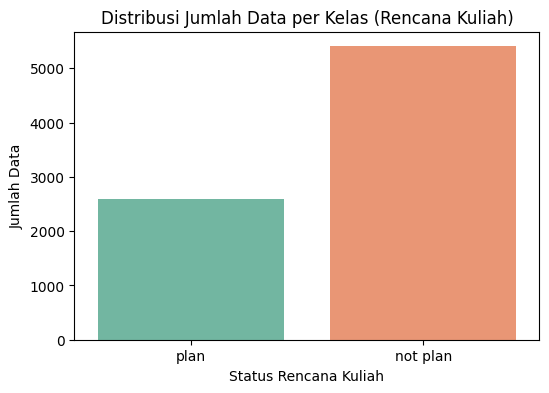

In [10]:
# Visualisasi Distribusi Label Target (Plan)
plt.figure(figsize=(6,4))
sns.countplot(x="Plan", data=df, hue="Plan", palette="Set2", legend=False)
plt.title("Distribusi Jumlah Data per Kelas (Rencana Kuliah)")
plt.xlabel("Status Rencana Kuliah")
plt.ylabel("Jumlah Data")
plt.show()

# not plan 0, plan 1


*  encoding data kategorikal (mapping label ke kode numerik)

In [11]:
# mapping label -> kode untuk target
plan_classes = list(df['Plan'].astype('category').cat.categories)  # simpan label aslinya (misal: ['not plan', 'plan'])
df['Plan'] = df['Plan'].astype('category').cat.codes

# fitur kategorikal lain
for col in ['Gender', 'Encourage']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

df.head()



,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,1,53900,118,0,1
1,4561,0,24900,87,1,0
2,4563,0,65800,93,1,0
3,4565,1,11440,117,0,1
4,4567,0,16700,102,1,0


6. analisis korelasi antar fitur

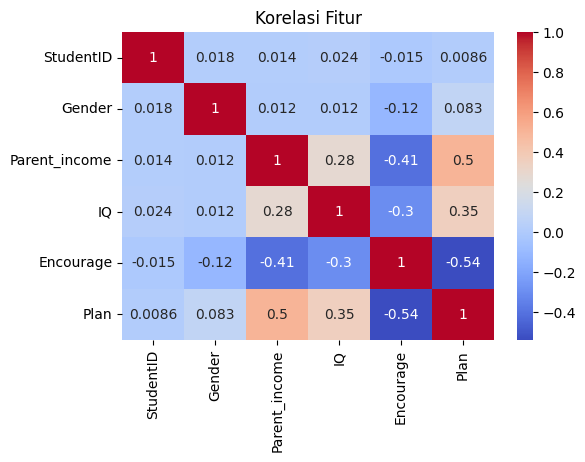

In [12]:
# Korelasi
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

7. splitting sata (pembagian data training dan testing)

In [13]:
# Memilih fitur dan target
feature_cols = ['Gender', 'Parent_income', 'IQ', 'Encourage']
X = df[feature_cols]
y = df['Plan']

# Membagi dataset menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

len(X_train), len(X_test)

(6400, 1600)

8. pembuatan model decision tree

In [14]:
# Membangun model
dt = DecisionTreeClassifier(
   criterion='gini',
   max_depth=4,
   random_state=42
   )
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

9. evaluasi model decision tree

In [15]:
# Evaluasi
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=plan_classes))


Akurasi: 82.62 %

Confusion Matrix:
 [[960 121]
 [157 362]]

Classification Report:
               precision    recall  f1-score   support

    not plan       0.86      0.89      0.87      1081
        plan       0.75      0.70      0.72       519

    accuracy                           0.83      1600
   macro avg       0.80      0.79      0.80      1600
weighted avg       0.82      0.83      0.82      1600



10. visualisasi hasil dari model decision tree

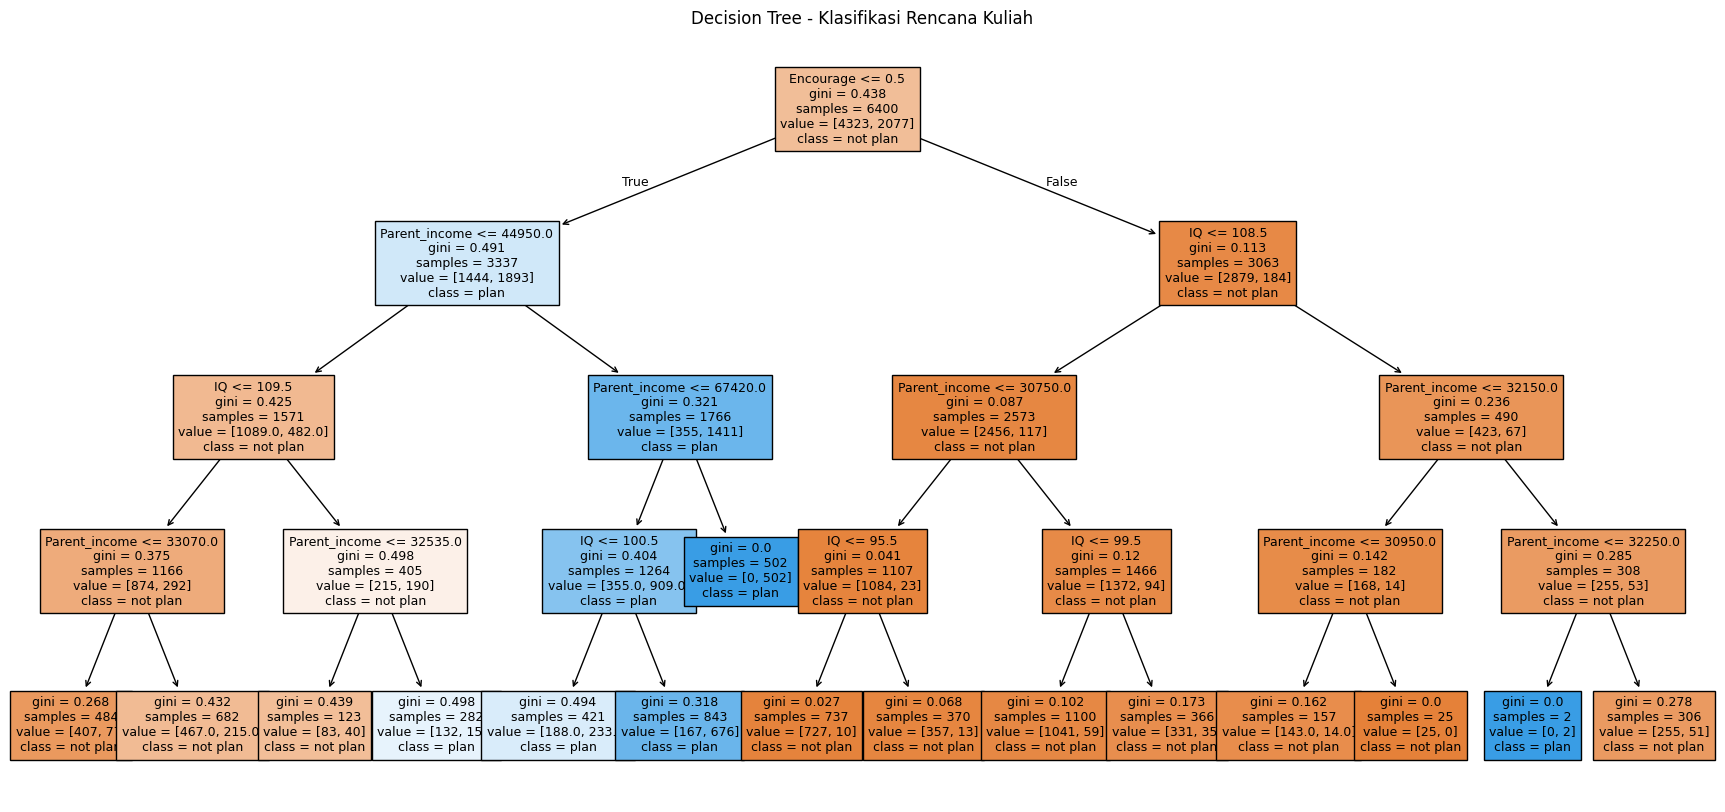

In [16]:
# Visualisasi model Decision Tree
plt.figure(figsize=(22, 10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=plan_classes,  # kembali ke nama asli ('not plan', 'plan')
    filled=True,
    fontsize=9
)
plt.title("Decision Tree - Klasifikasi Rencana Kuliah")
plt.show()

11. melihat fitur yang paling berpengaruh

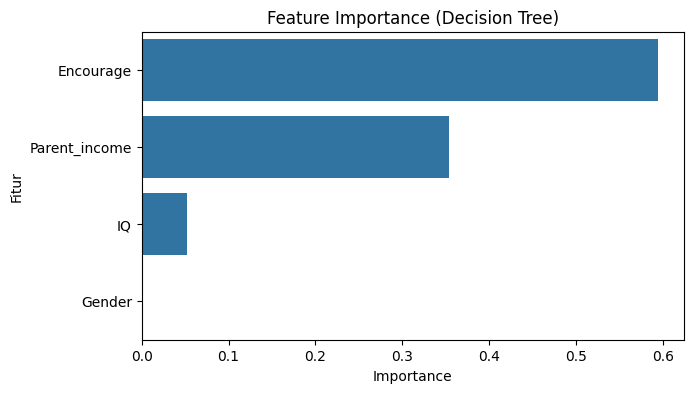

,0
Encourage,0.594873
Parent_income,0.353383
IQ,0.051744
Gender,0.000000


In [17]:
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp

12. menentukan max_depth terbaik

In [18]:
scores = {}
for d in range(2, nine := 9):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d]*100, 2), "%")

Best max_depth: 4 | Acc: 82.62 %


## TUGAS PRAKTIKUM MANDIRI

1. Loading Data

*  Membaca Dataset

In [19]:
df = pd.read_csv("/content/drive/MyDrive/Praktikum_ML/Praktikum07/data/dataset_satelit.csv")
df.head()

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


*  menampilkan informasi umum dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        

2. Data Pre-processing

*  Cek duplikat pada dataset

In [21]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
589,False
590,False
591,False
592,False


*  Cek missing value

In [22]:
df.isnull().sum()

,0
No,0
Longitude,0
Lattitude,0
N,0
P,0
K,1
Ca,0
Mg,0
Fe,0
Mn,0


In [23]:
# ubah nilai kosong atau teks jadi NaN biar bisa dihapus beneran
df['K'] = pd.to_numeric(df['K'], errors='coerce')

*  Menghapus missing value pada kolom K

In [24]:
df = df.dropna(subset=['K'])

*  Mencek kembali missing value

In [25]:
df.isnull().sum()

,0
No,0
Longitude,0
Lattitude,0
N,0
P,0
K,0
Ca,0
Mg,0
Fe,0
Mn,0


3. Exploratory Data Analysis (EDA)

*  Menghitung statistik pada kolom numeric dengan describe

In [26]:
df.describe()

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,...,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,297.686341,106.885588,-1.025914,2.258567,0.141315,0.582175,0.595508,74.479005,308.371636,2.395076,...,0.176828,0.234589,0.102902,28.628855,28.653355,28.601010,0.202591,0.051538,0.269591,0.062316
std,171.702040,4.951123,0.965868,0.395626,0.019735,0.222567,0.366289,55.529359,241.796080,1.578795,...,0.155338,0.070520,0.112371,15.335689,15.390797,15.340691,0.104445,0.012965,0.143844,0.024238
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.000000,102.927856,-2.233340,1.980000,0.130000,0.429000,0.320000,40.690000,124.390000,1.180000,...,0.046900,0.183360,0.039550,31.940870,31.953140,33.686050,0.182220,0.040200,0.244510,0.052770
50%,298.000000,103.582039,-0.602293,2.280000,0.140000,0.549000,0.540000,65.620000,239.800000,2.230000,...,0.072700,0.213610,0.046570,35.058620,35.103770,34.612970,0.233760,0.050420,0.310630,0.068400
75%,446.000000,113.403800,-0.257348,2.570000,0.150000,0.710000,0.790000,87.200000,435.030000,3.360000,...,0.318300,0.262250,0.059230,38.320020,38.457750,39.002800,0.272000,0.060480,0.364520,0.079030
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


4. Analisis Korelasi terhadap Target K

In [27]:
# Pastikan kolom numerik saja
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi antar kolom
corr_matrix = df_numeric.corr()

# Ambil korelasi terhadap kolom K, urutkan dari yang paling kuat
corr_with_K = corr_matrix['K'].sort_values(ascending=False)

print("=== Korelasi Terhadap K ===")
print(corr_with_K)

=== Korelasi Terhadap K ===
K            1.000000
Longitude    0.437909
b6           0.384791
b7           0.216405
lia          0.215917
plia         0.215653
iafe         0.209885
gamma0_vh    0.207347
Cu           0.200614
No           0.184023
gamma0_vv    0.182858
beta0_vh     0.166213
b11          0.160135
b3           0.139958
b4           0.139720
beta0_vv     0.134312
P            0.113762
b2           0.070040
b12          0.057529
b1           0.000634
Ca          -0.088435
Sigma_VV    -0.109655
B           -0.135192
N           -0.138219
Sigma_VH    -0.146525
b8a         -0.171450
b9          -0.172032
b8          -0.172415
Fe          -0.192682
b5          -0.204723
Zn          -0.312304
Mn          -0.366838
Lattitude   -0.449305
Name: K, dtype: float64


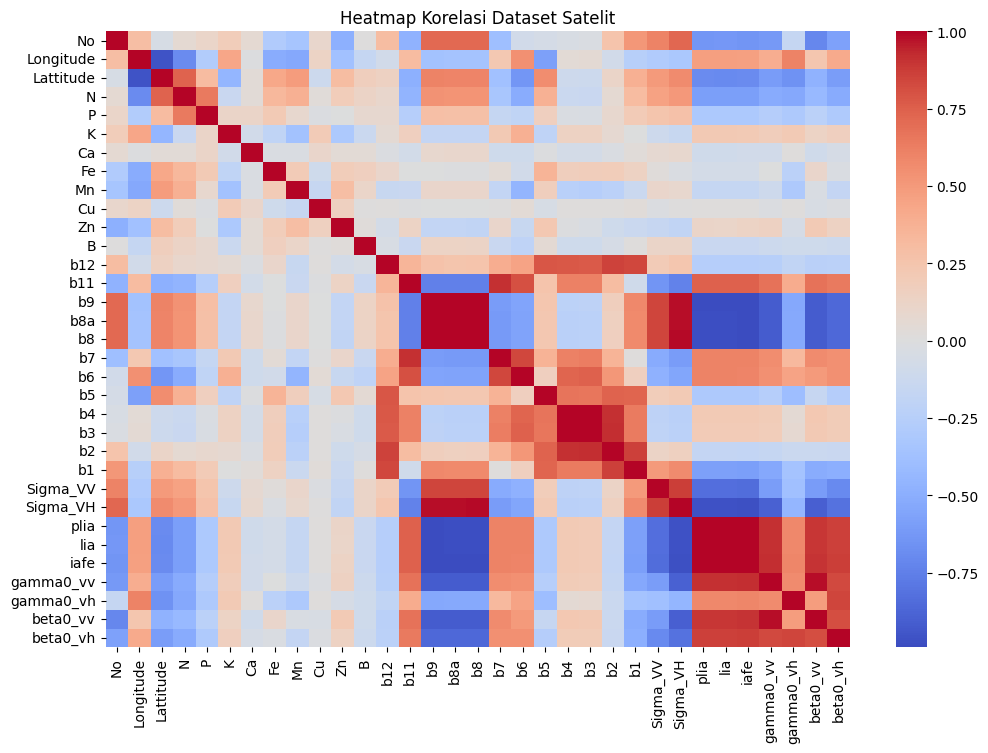

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Heatmap Korelasi Dataset Satelit')
plt.show()


5. Membagi dataset untuk training dan testing

In [43]:
from sklearn.model_selection import train_test_split

# Fitur (X) = kolom yang paling berpengaruh terhadap K berdasarkan korelasi
X = df[["N", "P", "Ca", "Fe", "Mn", "Cu", "Zn", "B",
    "b5", "b6", "b7", "b8a", "b9", "Sigma_VV", "Sigma_VH",
    "lia", "plia", "gamma0_vv", "gamma0_vh", "beta0_vh"
]]

# Target (Y) = K (Kalium)
y = df["K"]


# Bagi data 80% untuk training dan 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Cetak pembagian data
print("Jumlah data training :", len(X_train))
print("Jumlah data testing  :", len(X_test))

# Tampilkan beberapa data training pertama
X_train.head()

Jumlah data training : 474
Jumlah data testing  : 119


,N,P,Ca,Fe,Mn,Cu,Zn,B,b5,b6,b7,b8a,b9,Sigma_VV,Sigma_VH,lia,plia,gamma0_vv,gamma0_vh,beta0_vh
246,2.30,0.15,0.99,95.38,383.81,3.52,12.57,9.10,0.31670,0.18540,0.36490,0.38470,1.23540,0.24276,0.03881,36.15917,36.13451,0.29284,0.04682,0.06940
272,1.73,0.13,0.36,26.50,91.46,1.06,7.14,16.08,0.12700,0.31030,0.37780,0.40860,0.40030,0.22541,0.04810,37.38435,37.37465,0.28999,0.06188,0.07645
109,2.71,0.16,0.31,58.84,695.31,1.94,18.57,17.10,0.21040,0.07700,0.25710,0.28590,0.27080,0.20749,0.03518,34.14444,34.14405,0.25166,0.04267,0.06217
484,2.87,0.17,1.03,54.01,354.16,0.42,12.64,13.61,0.36167,0.03951,0.21832,38.07327,38.01286,0.35740,0.34740,0.26340,0.33270,0.04520,0.07970,0.06410
311,1.43,0.12,0.23,32.33,97.42,2.96,18.28,16.49,0.12790,0.33210,0.40100,0.44000,0.42770,0.21294,0.05164,35.44419,35.43666,0.27430,0.06652,0.08192


6. Training model

In [44]:
from sklearn.linear_model import LinearRegression

# Buat model dan latih
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

7. Evaluasi Model Linear Regression (Target: K)

In [46]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Prediksi data uji
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Tampilkan hasil evaluasi
print("=== Evaluasi Model Linear Regression (Target: K) ===")
print("Koefisien :", model.coef_)
print("Intercept :", model.intercept_)
print(f"R² Score  : {r2:.4f}")
print(f"MAE       : {mae:.4f}")
print(f"MSE       : {mse:.4f}")
print(f"RMSE      : {rmse:.4f}")

=== Evaluasi Model Linear Regression (Target: K) ===
Koefisien : [ 1.29219281e-01  1.64156589e+00 -2.59882791e-02 -3.66023704e-04
 -1.03133276e-04  2.41786473e-02 -6.20017385e-03 -2.19166795e-03
 -7.90846909e-01  9.60230096e-01 -3.25533143e-02  6.12114400e-02
 -7.35577901e-02  1.33376936e+00  4.20962634e-01 -1.11561165e-02
  8.10033620e-03 -9.60554427e-01 -8.21988241e+00  5.23988305e+00]
Intercept : 0.376794455286364
R² Score  : 0.3283
MAE       : 0.1384
MSE       : 0.0301
RMSE      : 0.1735


8. Menampilkan Persamaan Regresi Linear (Target: K)

In [48]:
# Ambil slope (koefisien) dan intercept dari model
intercept = model.intercept_
coef = model.coef_

# Menampilkan persamaan regresi linear berganda
print("Persamaan Regresi Linear Berganda:")
persamaan = f"K = {intercept:.3f}"
for var, c in zip(X.columns, coef):
    persamaan += f" + ({c:.3f} × {var})"

print(persamaan)

Persamaan Regresi Linear Berganda:
K = 0.377 + (0.129 × N) + (1.642 × P) + (-0.026 × Ca) + (-0.000 × Fe) + (-0.000 × Mn) + (0.024 × Cu) + (-0.006 × Zn) + (-0.002 × B) + (-0.791 × b5) + (0.960 × b6) + (-0.033 × b7) + (0.061 × b8a) + (-0.074 × b9) + (1.334 × Sigma_VV) + (0.421 × Sigma_VH) + (-0.011 × lia) + (0.008 × plia) + (-0.961 × gamma0_vv) + (-8.220 × gamma0_vh) + (5.240 × beta0_vh)


9. Visualisasi Hasil Prediksi (Target: K)

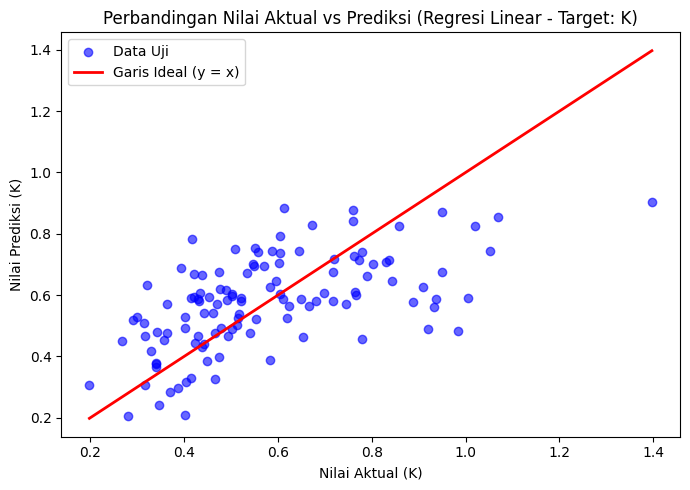

In [49]:
import matplotlib.pyplot as plt

# Scatter plot antara nilai aktual dan prediksi
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Data Uji')

# Garis ideal (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linewidth=2, label='Garis Ideal (y = x)')

# Label dan judul
plt.xlabel("Nilai Aktual (K)")
plt.ylabel("Nilai Prediksi (K)")
plt.title("Perbandingan Nilai Aktual vs Prediksi (Regresi Linear - Target: K)")
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
# Prediksi pada data test
y_pred_test = model.predict(X_test)

# Buat tabel hasil (beberapa kolom penting + aktual + prediksi)
hasil = pd.DataFrame({
    "N": X_test["N"].to_numpy(),
    "P": X_test["P"].to_numpy(),
    "Ca": X_test["Ca"].to_numpy(),
    "Fe": X_test["Fe"].to_numpy(),
    "Mn": X_test["Mn"].to_numpy(),
    "Cu": X_test["Cu"].to_numpy(),
    "Zn": X_test["Zn"].to_numpy(),
    "B": X_test["B"].to_numpy(),
    "Nilai Aktual (K)": y_test.to_numpy(),
    "Nilai Prediksi (K)": y_pred_test
})

# 1️⃣ Hitung selisih error (positif = overpredict)
hasil["Selisih Error (K)"] = hasil["Nilai Prediksi (K)"] - hasil["Nilai Aktual (K)"]

# 2️⃣ Hitung akurasi per baris (100 * (1 - |error| / aktual)), dibatasi 0–100
denom = hasil["Nilai Aktual (K)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih Error (K)"].abs() / denom)).clip(lower=0, upper=1) * 100

# Tampilkan 5 baris pertama
hasil.head()

,N,P,Ca,Fe,Mn,Cu,Zn,B,Nilai Aktual (K),Nilai Prediksi (K),Selisih Error (K),Akurasi (%)
0,2.69,0.20,0.22,115.31,830.22,0.09,13.73,10.63,0.364,0.570406,0.206406,43.295074
1,2.23,0.13,0.69,104.06,261.49,1.94,30.58,16.68,0.414,0.331081,-0.082919,79.971155
2,2.36,0.14,0.25,88.02,158.32,5.28,23.43,24.36,0.937,0.586596,-0.350404,62.603605
3,1.82,0.11,0.28,37.94,106.15,0.84,3.05,12.95,1.052,0.744249,-0.307751,70.746090
4,2.49,0.17,0.49,122.87,129.28,0.09,15.21,9.49,0.789,0.663047,-0.125953,84.036328


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!git config --global user.email "ariakristallnacht@gmail.com"
!git config --global user.name "Aria Kristallincht"

!git clone https://github.com/Ariakristallnacht/TI03_AriaKS_0110222076.git
%cd   TI03_AriaKS_0110222076

!cp -r /content/drive/MyDrive/Praktikum_ML/Praktikum07/ ./Praktikum07

!ls -lah

!git add .
!git commit -m "praktikum 6 ml"

from getpass import getpass
import os

token = getpass("Masukkan GitHub Token: ")

os.system(f'git remote set-url origin https://{token}@github.com/Ariakristallnacht/TI03_AriaKS_0110222076.git')

!git push origin main